# Part 1

**Question** : In the implementation of QFT for $|0010\rangle$ we use `QFT(4, inverse=False)` but in the second part we use `QFT(4, inverse=True)` to find the frequency of the function. Give a good explainantion as to why we have to use inverse QFT for finding freq. of $e^{2ix}$.

**Answer** : In the first part, we used QFT for $\ket {0010}$ to convert it to the frequency basis, and we got a superposition with equal amplitudes as the result. But in the second part, we started in the frequency basis itself by preparing the $e^{2ix}$ and dividing it into 16 parts and creating a superposition. So we technically started with the 'output' of the first part and applied inverse QFT on it. And as we know, QFT followed by inverse QTF, returns back to the original state, so we applied inverse QFT here to get the ket $\ket{0010}$.

**Task** : Implement Fourier Transform of $sin(2x)$ and $sin(8x)$ similarly as to what I have done for $e^{2ix}$ and plot the histogram of the results.

In [109]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import QFT

Measurement counts: {'1110': 4742, '0010': 4858}


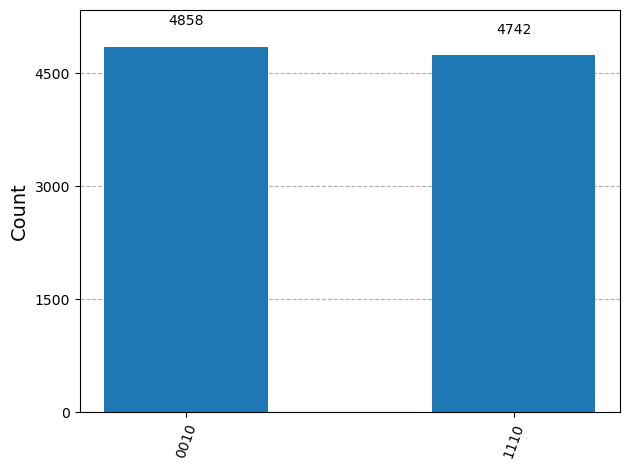

In [111]:
#Code for sin(2x)
# Step 1: Discretize sin(2x) into 2^4 = 16 points
n_qubits = 4
num_points = 2**n_qubits
x = np.linspace(0, 2*np.pi, num_points, endpoint=False)
func_values = np.sin(2*x)

# Normalize the values to fit as amplitudes
normalized_values = func_values / np.linalg.norm(func_values)

# Step 2: Encode the normalized values into a quantum state
qc_exp = QuantumCircuit(n_qubits)
qc_exp.initialize(normalized_values, range(n_qubits))

qft_circ_inv = QFT(4, inverse=True)

qc_exp.compose(qft_circ_inv, inplace=True)
qc_exp.measure_all()

simulator = AerSimulator()
qc_exp_comp = transpile(qc_exp, simulator)

result = simulator.run(qc_exp_comp, shots=9600).result()

# Get and plot counts
counts = result.get_counts()
print("Measurement counts:", counts)
plot_histogram(counts)

Measurement counts: {'0011': 857, '1000': 2890, '1011': 649, '1101': 871, '0100': 1222, '0101': 628, '1110': 138, '0111': 385, '1001': 337, '0000': 170, '1100': 1185, '0001': 34, '0010': 155, '0110': 19, '1111': 44, '1010': 16}


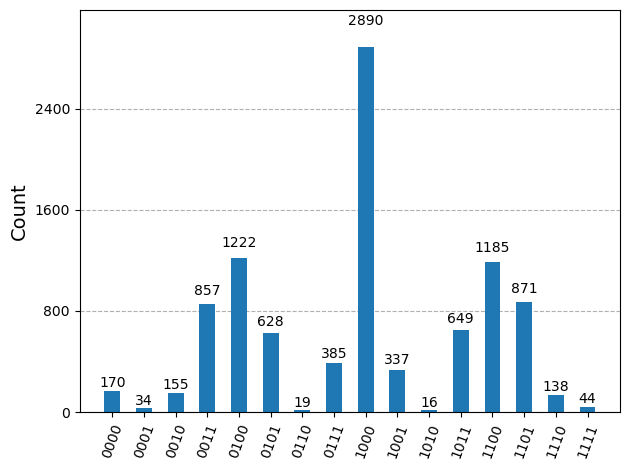

In [113]:
#Code for sin(8x)
# Step 1: Discretize sin(8x) into 2^4 = 16 points
n_qubits = 4
num_points = 2**n_qubits
x = np.linspace(0, 2*np.pi, num_points, endpoint=False)
func_values = np.sin(8*x)

# Normalize the values to fit as amplitudes
normalized_values = func_values / np.linalg.norm(func_values)

# Step 2: Encode the normalized values into a quantum state
qc_exp = QuantumCircuit(n_qubits)
qc_exp.initialize(normalized_values, range(n_qubits))

qft_circ_inv = QFT(4, inverse=True)

qc_exp.compose(qft_circ_inv, inplace=True)
qc_exp.measure_all()

simulator = AerSimulator()
qc_exp_comp = transpile(qc_exp, simulator)

result = simulator.run(qc_exp_comp, shots=9600).result()

# Get and plot counts
counts = result.get_counts()
print("Measurement counts:", counts)
plot_histogram(counts)

**Question** : The histogram for $sin(2x)$ shows peaks at 2 and 14. Explain why this makes sense theoretically, especially the peak at 14.

**Answer** : The inverse QFT converts a superposition of $e^{kix}$ to only the ket $\ket k$, as we saw in the $e^{2ix}$ example above. So now, we are starting with $sin(2x)$ which can be written as
$$ sin(2x) = (i/2) * (e^{2ix} - e^{-2ix}) $$
So this is a linear combination of these 2 powers of e. Now when we apply inverse QFT, which is a linear operator (as unitary operators are linear operators), we can use this property of linear operators
$$A(\ket a + \ket b) = A\ket a + A\ket b$$
Hence, for $e^{2ix}$, we will get ket $\ket 2$ which is $\ket {0010}$. But what about $e^{-2ix}$?
Here,  we have divided a circle into 16 points, and the ket $\ket k$ means taking $k$ steps on this 16 step circle. So $-k$ means starting from $0$ and taking $-2$ steps on this circle, which is equivalent to starting from $0$ and taking $14$ steps on the circle because we have 16 total steps (all steps here are in clockwise direction). So we can say that $e^{-2ix}$ is equivalent to $e^{14ix}$ and hence, inverse QFT when operated on $e^{-2ix}$, returns ket $\ket {14}$, which is $\ket {1110}$. Therefore we end up with a superposition of ket 2 and ket 14 after applying inverse QFT on $sin(2x)$ and hence the peaks in the histogram.

**Question** : The histogram for $sin(8x)$ shows expected peak at 8 but this the plot has a distict different pattern (small peaks at other frequencies). This was not observed for either $e^{2ix}$ or $sin(2x)$. There is a very profound reason for this, please do some detailed research on this (maybe you find some insights related to the core principles behind DFT itself, be it classical one or its quantum counterpart). Give a detailed explaination for this pattern (Please dont write due to error, we are using noiseless AerSimulator for this).

**Answer** : For any $N$, $sin(kx)$ completes $k$ cycles in the $N$ points that are available, so for $N = 16$ and $k = 8$, $sin(8x)$ completes $8$ cycles on $16$ points, which leaves us with $2$ points per cycle. And one entire cycle of the $sin$ wave consists of starting from 0, to 1, to 0, to -1 and back to 0 (starting point). Therefore, as we have only $2$ points available per cycle, it captures only the max and min points, that is $+1$ and $-1$, which makes $sin(8x)$ look like a square wave rather than a smooth sinusoidal curve. Due to this, when we apply inverse QFT, it gives the output as a superposition of a lot of frequencies because we require a lot of different frequencies to construct a square wave. Hence, we get contributions from all the frequencies. This phenomenon is termed as **spectral leakage** and in our case, $N/2 = 8$ is known as the **Nyquist frequency**, which is the highest frequency we can represent.

To verify this, let us now create a superposition of 32 basis states and see what happens when we apply inverse QFT on $sin(8x)$ this time.

Measurement counts: {'11000': 4799, '01000': 4801}


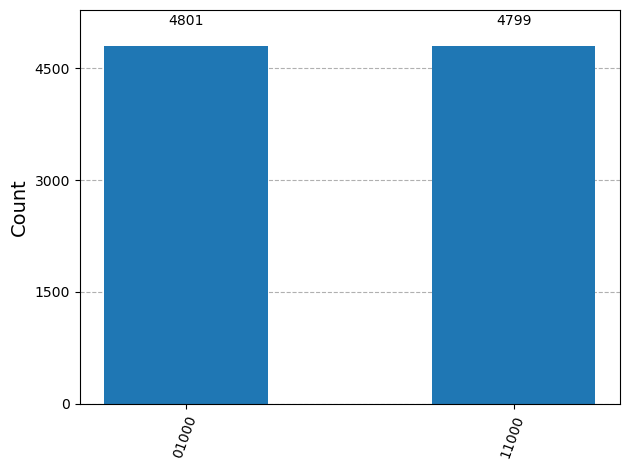

In [115]:
#Verifying our understanding about sin(8x)
# Step 1: Discretize sin(8x) into 2^5 = 32 points
n_qubits = 5
num_points = 2**n_qubits
x = np.linspace(0, 2*np.pi, num_points, endpoint=False)
func_values = np.sin(8*x)

# Normalize the values to fit as amplitudes
normalized_values = func_values / np.linalg.norm(func_values)

# Step 2: Encode the normalized values into a quantum state
qc_exp = QuantumCircuit(n_qubits)
qc_exp.initialize(normalized_values, range(n_qubits))

qft_circ_inv = QFT(5, inverse=True)

qc_exp.compose(qft_circ_inv, inplace=True)
qc_exp.measure_all()


simulator = AerSimulator()
qc_exp_comp = transpile(qc_exp, simulator)

result = simulator.run(qc_exp_comp, shots=9600).result()

# Get and plot counts
counts = result.get_counts()
print("Measurement counts:", counts)
plot_histogram(counts)

As expected, we get two peaks, one at ket $\ket 8$ and another one at ket $\ket {24}$, which is $N - k = 32 - 8 = 24$

**Question** : The method I have used above to load a function onto a quantum state is called Amplitude Encoding. It is a technique used in quantum computing to represent classical data within the amplitudes of a quantum state but it is often not considered optimal for practical applications. Give an explainantion as to why this is the case and also briefly describe 1-2 alternatives for this that can be used. (I was planning to include such alternatives in the next assignment but I might not be able to due to time constraints, but still these are used in the latest cutting edge algoritms/research and you should atleast know of them)

**Answer** : In amplitude encoding, we prepare the entire superposition state by writing each amplitude individually. We use $\log_2 N$ qubits to store $N$ basis vectors, but while preparing the superposition, we need to apply gates which depend uniquely on all the individual amplitudes, therefore we need $O(N)$ gates. Hence in preparation, there is no exponential advantage that is there in the storage. Also, we cannot measure the amplitude directly. We always measure probability, which is the square of mod of the amplitude and hence, if the amplitude is negative or consists of complex numbers, we won't get that information. Also, more the qubits we use, more is the noise that accumulates in the system, and as amplitude encoding depends on precise superposition of many basis states, it is more sensitive to errors.

**Alternative 1 - Basis Encoding** : In this method, we use an integer $x$ to represent the ket $\ket x$. For eg, we use $x$ to represent a single computational basis $\ket {x1x2x3...}$. To reach $\ket x$, we apply $X$ gates on individual qubits, and hence it takes atmost $O(log_2 N)$ gates.

**Alternative 2 - Angle Encoding** : In this method, we store individual pieces of information into the rotation angles of individual qubits. For eg, for the data piece $x_j$, we apply rotation gate $R(x_j)$ on the $j-th$ qubit
$$R(x_j) \ket 0 = cos(x_j/2) \ket 0 + sin(x_j/2) \ket 1$$
This method of preparation is efficient because it takes only $O(d)$ single-qubit rotation gates, where $d$ is the number of pieces of information we have.

-----

# Part 2

**Question** : But wait a second, why do we use $\phi = 2\pi \theta / 4$? where does this 4 come from? All we can connect this 4 to is that we know that $\theta$ is less than 4. But why do we divide by 4.

**Answer** : If we just keep $\phi = 2\pi\theta$, and as $\theta < 4$, in the power of $e$, it is written as $e^{2i\pi\theta}$, and as we know, this funtion is periodic with a period $2\pi$, so if $\theta$ is greater than 1, we can write $\theta = y + z$, where $y$ is an integer and $z$ belongs to $[0,1)$, so $e^{2i\pi\theta} = e^{2i\pi z}$. Therefore, using QPE, we will get the value of $z$ as the result instead of $\theta$, which is not what we want, because QPE measures $\theta$ $mod$ $1$ and hence we lose the integral part of $\theta$. Hence we normalize $\theta$ to lie between $[0,1)$ by dividing it by $4$. We can then retrieve the real value of $\theta$ by multiplying the final answer by $4$

**Task** : Implement the QPE circuit to find the phase of U for the eigenvector $|1\rangle$. You can use the book for your reference on what steps shoud be taken

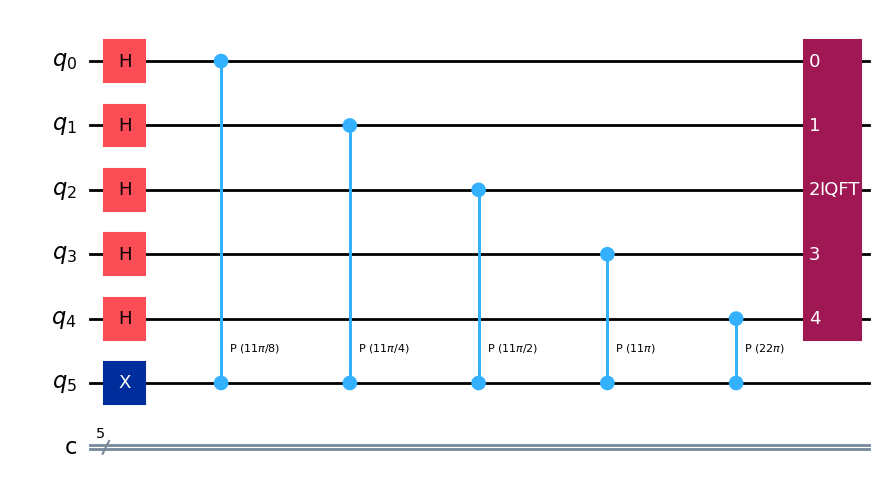

In [117]:
t = 5 #since theta can take value upto 4, resolution = 4/2^t, and using this, if we want accuracy till 3 decimal places, we must use t = 5
n = 1 # since the matrix U is 2x2, we need only 1 qubit to store its information
qc_qpe = QuantumCircuit (t+n, t) # t classical bits for measurement

qc_qpe.x(t) #Initialize target qubit to 1 because the eigenvector of U corresponding to e^2*pi*theta is |1>
qc_qpe.h(range(t)) #create superposition

import base64
with open("theta.txt", "r") as f:
    encoded_theta = f.read()
theta = float(base64.b64decode(encoded_theta).decode())
phi = (2 * np.pi * theta) / 4

for power in range(t) :
    qc_qpe.cp(theta=2**power*phi, control_qubit = power, target_qubit = t)

qc_qpe.append(QFT(t, inverse=True), range(t))

qc_qpe.draw('mpl')

**Task** : Find the values of the phase and multiply it by 4 to get the value of $\theta$

10110
{'10110': 1000}
2.75


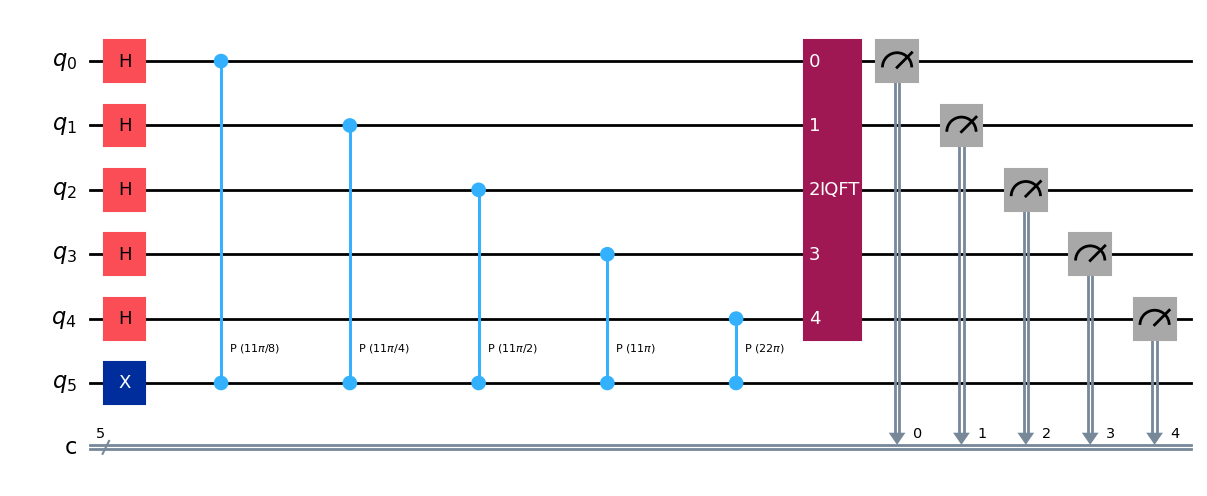

In [119]:
qc_qpe.measure(range(t), range(t))

simulator = AerSimulator()
qc_qpe_comp = transpile(qc_qpe, simulator)
result = simulator.run(qc_qpe_comp, shots=1000).result()
counts = result.get_counts()
output = max(counts, key=counts.get) #extract the result with highest probability
print(output)
print(counts)

#Now lets convert from binary to decimal
phi_dash = 0.0
for i, bit in enumerate(output, start = 1) :  #start = 1 because we write b = 0.b1b2b3 as b1*2^-1 + ... and not b1*2^0, (i starts from 1)
    if bit == '1':
        phi_dash += 2**(-i)

theta = phi_dash * 4
print (theta)

qc_qpe.draw('mpl')

------

# Part 3

**Task** : Since you know that N=15 (as it is part of the public key), factorize it (using a=7) to obtain p and q such that p*q = 15.

In [121]:
from qiskit import QuantumRegister, ClassicalRegister
import pandas as pd
from fractions import Fraction

            Register Output           Phase
0  00000000(bin) =   0(dec)    0/256 = 0.00
1  10000000(bin) = 128(dec)  128/256 = 0.50
2  11000000(bin) = 192(dec)  192/256 = 0.75
3  01000000(bin) =  64(dec)   64/256 = 0.25
   Phase Fraction  Guess for r
0   0.00      0/1            1
1   0.50      1/2            2
2   0.75      3/4            4
3   0.25      1/4            4
For r = 1
Period 'r' is odd. Try another 'a'.
For r = 2
Factors of 15: [3]
For r = 4
Factors of 15: [3, 5]
For r = 4
Factors of 15: [3, 5]
[3, 5]
3
5


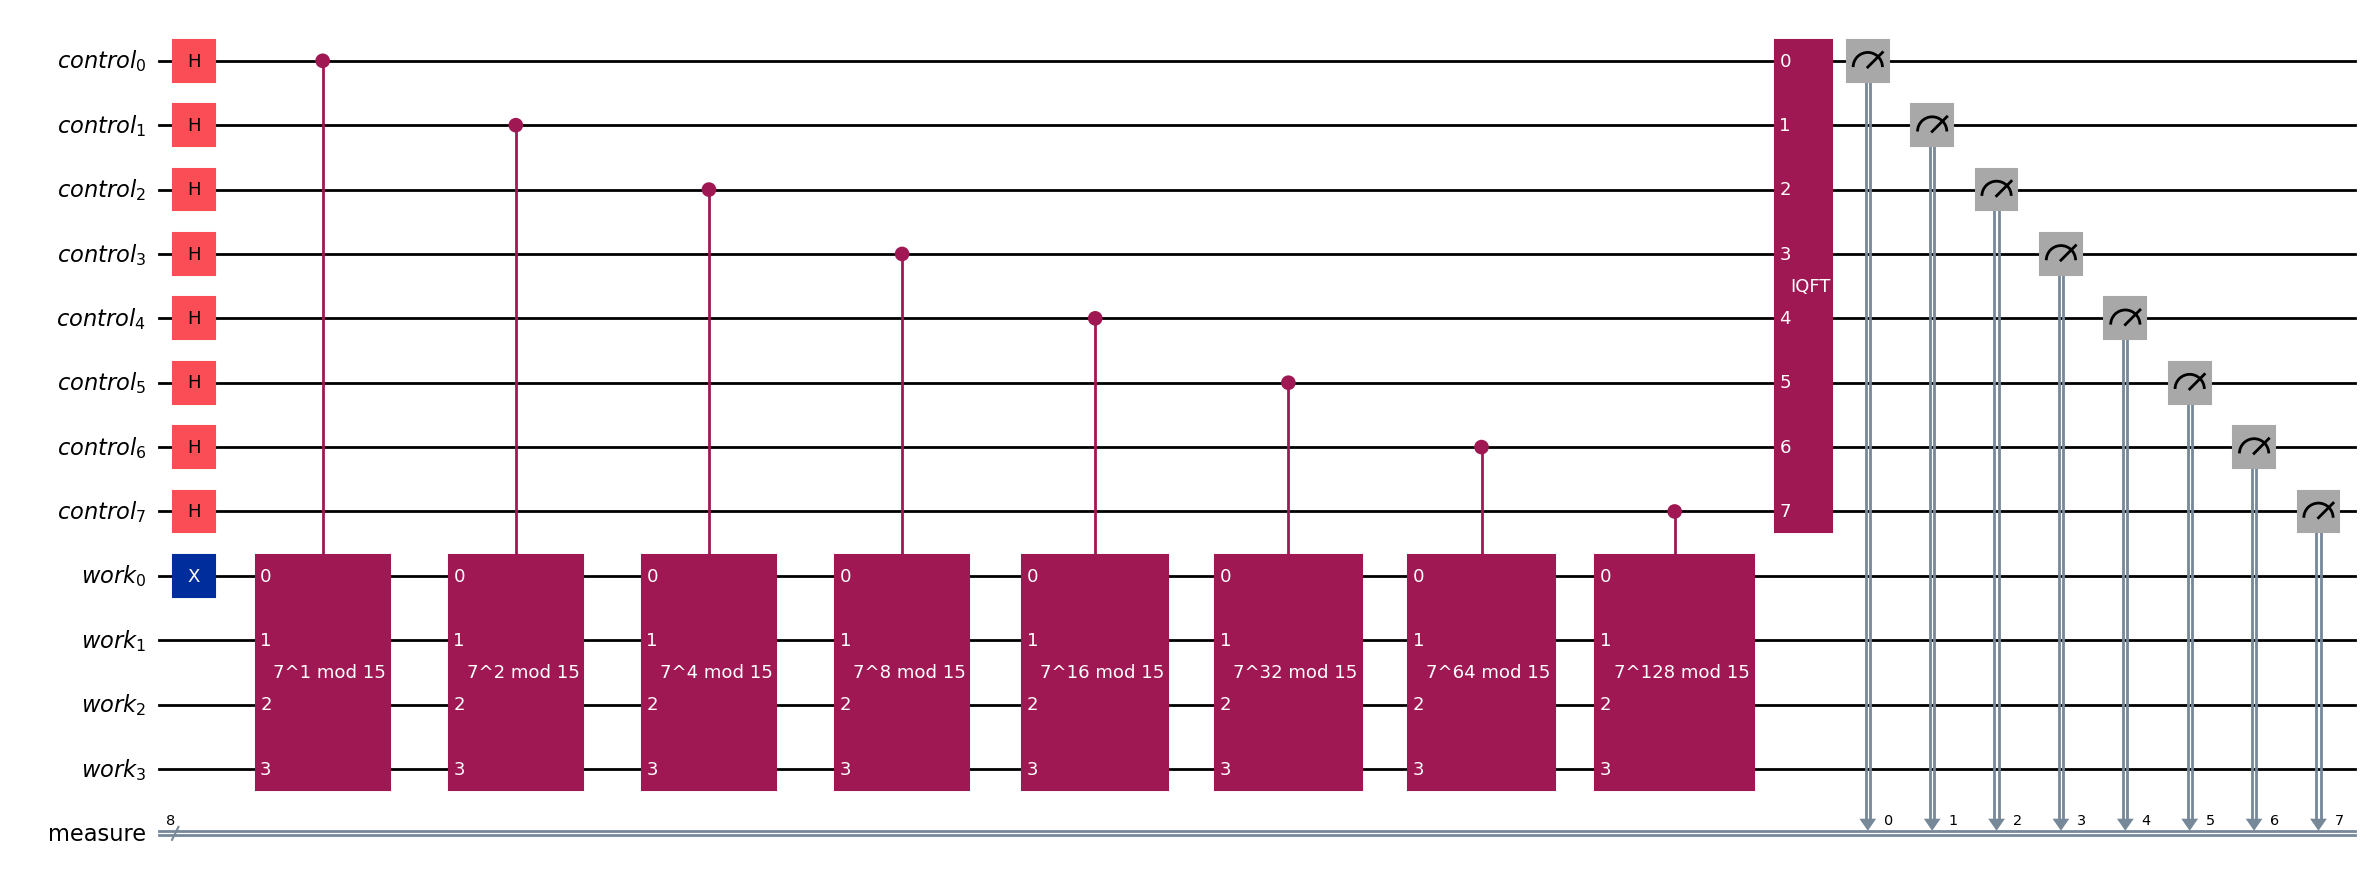

In [123]:
# Choose a coprime 'a'
a = 7
N = 15

# Create the quantum circuit
n_work = 4     # Work qubits (for modular arithmetic)
n_control = 2*n_work   # Control qubits (more = better precision)
qr = QuantumRegister(n_work, name='work')
qr2 = QuantumRegister(n_control, name='control')
cr = ClassicalRegister(n_control, name='measure')
qc_shor = QuantumCircuit(qr2, qr, cr)

# Initialize work register to |1⟩ (for modular exponentiation)
qc_shor.x(n_control)

# Apply Hadamard gates to control register
for qubit in range(n_control):
    qc_shor.h(qubit)

def c_amod15(a, power):
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13") # a & N must be co-prime
    U = QuantumCircuit(4)
    for _iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"
    c_U = U.control()
    return c_U

# Do controlled-U operations
for q in range(n_control):
    qc_shor.append(c_amod15(a, 2**q),[q] + [i+ n_control for i in range(4)])

# Do inverse-QFT
qc_shor.append(QFT(n_control, inverse=True), range(n_control))

# Measure circuit
qc_shor.measure(range(n_control), range(n_control))

# Simulate
simulator = AerSimulator()
compiled_qc_shor = transpile(qc_shor, simulator)
result = simulator.run(compiled_qc_shor, shots=1000).result()
counts = result.get_counts()

rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_control)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)",f"{decimal}/{2**n_control} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

rows = []
candidate = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)  # Find the factional form using continued fractions algorithm
    candidate.append(frac.denominator)
    rows.append([phase,
                 f"{frac.numerator}/{frac.denominator}",
                 frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

# Factor N
factors = []
for r in candidate:
    print(f"For r = {r}")
    if r % 2 == 0:
        if np.gcd(a ** (r // 2) - 1, N) not in factors and np.gcd(a ** (r // 2) - 1, N) not in [1,N] :
            factors.append (np.gcd(a ** (r // 2) - 1, N))
        if np.gcd(a ** (r // 2) + 1, N) not in factors and np.gcd(a ** (r // 2) + 1, N) not in [1,N] :
            factors.append (np.gcd(a ** (r // 2) + 1, N)) 
        candidates = [np.gcd(a ** (r // 2) - 1, N), np.gcd(a ** (r // 2) + 1, N)]
        print("Factors of 15:", [c for c in candidates if c not in [1, N]])
    else:
        print("Period 'r' is odd. Try another 'a'.")

print (factors)

p , q = factors
print (p)
print (q)

qc_shor.draw('mpl',fold=-1)  # -1 means 'do not fold'


**Task** : Given p and q, compute $\phi (N)$ = (p-1)(q-1).

In [125]:
phi_of_N = (p-1)*(q-1)
print (phi_of_N)

8


**Task** : Solve for d such that e * d ≡ 1 mod , we know e as it is part of the public key. (Check online if there is a method in python through which we can directly obtain d from the above equation)

In [127]:
e = 7
d = pow(e, -1, int(phi_of_N)) #Direct method
print (d)

7


**Task** : The ciphertext (c) [14, 9, 12, 5] was encrypted as c = $m^e$ mod 15, where m maps letters to numbers (A=1, B=2, C=3 ..., N=14) (As N is 15, I could only use  the first 14 letters). You can decrypt each number using m = $c^d$ mod 15. 

In [129]:
ciphertext = [14, 9, 12, 5]
riyaltext = []

def decrypter (a) : 
    return (a**d)%N

for i in range(len(ciphertext)) :
    riyaltext.append(decrypter(ciphertext[i]))

**Task** : Map the results back to letters to reveal the secret word.

In [131]:
for i in range(len(ciphertext)) :
    riyaltext[i] = chr(ord('a') + riyaltext[i] - 1) # ord() gives ASCII value of 'a'

secret_word = ''.join(riyaltext) # Converting from tuple of characters to one word string
print(secret_word)

nice
